<a href="https://colab.research.google.com/github/Vasanthnaik11/sustainability-internship-project/blob/main/solar_pannel_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# ============================
# 📦 STEP 1 — Setup Environment
# ============================
# from google.colab import drive
# drive.mount('/content/drive')  # Optional: if you want to save files to Drive

import os
import zipfile
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ============================
# 📁 STEP 2 — Unzip Dataset
# ============================
# NOTE: The zip file upload and extraction are now handled in a separate cell (kW8LwRu_Ejay).
# Ensure that cell has been run successfully before proceeding.

zip_path = "/content/archive (3).zip"   # uploaded dataset path - Make sure this path is correct!
extract_path = "/content/dataset"

# Ensure the extract directory exists
os.makedirs(extract_path, exist_ok=True)

# The extraction process is handled in cell kW8LwRu_Ejay.
# This block is kept for reference on how extraction was originally intended.
# try:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("✅ Dataset extracted successfully to:", extract_path)

#     # View folder structure
#     print("\nDataset folder structure after extraction:")
#     for root, dirs, files in os.walk(extract_path):
#         print(f"📁 {root} -> {len(files)} files")

# except FileNotFoundError:
#     print(f"❌ Error: The zip file was not found at {zip_path}. Please check the path.")
# except zipfile.BadZipFile:
#     print(f"❌ Error: The file at {zip_path} is not a valid zip file.")
# except Exception as e:
#     print(f"❌ An unexpected error occurred during extraction: {e}")


# ============================
# 🧹 STEP 3 — Organize Folder
# ============================
# IMPORTANT: Your dataset *must* be organized into subfolders within /content/dataset,
# where each subfolder represents a class (e.g., /content/dataset/healthy, /content/dataset/damaged).
# If your extracted dataset is not already in this format, you need to manually
# create these folders and move the images into them before proceeding.
# After organizing, run cells u4q2pQ-YFE3V, hmknvvCqFK8R, and h9EUb_XOFg5b.

print("\n--- IMPORTANT ---")
print("Please ensure your dataset in /content/dataset is organized into class-specific subfolders.")
print("Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged")
print("After organizing the dataset, re-run the cells from 'Data Generators' onwards.")
print("-----------------")


# ============================
# 🧠 STEP 4 — Data Generators
# ============================
# These generators will only find images if the dataset is organized into class subfolders.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train / 20% val
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

print("\nAttempting to create data generators...")
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

if train_generator.n == 0 and val_generator.n == 0:
    print("⚠️ Data generators found 1000 images. Please check that your dataset in /content/dataset is organized into class subfolders and re-run this cell and subsequent cells.")
else:
    print("✅ Data preprocessing complete.")


# ============================
# 🖼️ STEP 5 — Visualize Samples
# ============================
# This step will only work if the data generators successfully loaded images (i.e., found > 0 images).
if train_generator.n > 0:
    print("\nVisualizing sample augmented images...")
    x_batch, y_batch = next(train_generator)
    plt.figure(figsize=(8,8))
    for i in range(min(9, len(x_batch))): # Visualize up to 9 images, or fewer if batch is smaller
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.suptitle("Sample Augmented Images", fontsize=14)
    plt.show()
else:
    print("\nSkipping visualization: No images were found by the data generator. Please organize your dataset and re-run the cells.")


--- IMPORTANT ---
Please ensure your dataset in /content/dataset is organized into class-specific subfolders.
Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged
After organizing the dataset, re-run the cells from 'Data Generators' onwards.
-----------------

Attempting to create data generators...
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
⚠️ Data generators found 1000 images. Please check that your dataset in /content/dataset is organized into class subfolders and re-run this cell and subsequent cells.

Skipping visualization: No images were found by the data generator. Please organize your dataset and re-run the cells.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os

file_path = "/content/archive (3).zip"

if os.path.exists(file_path):
  print(f"The file {file_path} exists.")
else:
  print(f"The file {file_path} does not exist.")

The file /content/archive (3).zip exists.


In [16]:
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# ============================================================
# Developed by: Vasanth Naik
# Environment: Google Colab / Jupyter Notebook
# ============================================================

import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files


In [17]:
# Upload your dataset zip file (should contain train/test folders or images)
uploaded = files.upload()
zip_file = list(uploaded.keys())[0]

# Extract files
dataset_path = "/content/dataset"
os.makedirs(dataset_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

print("✅ Dataset extracted successfully at:", dataset_path)


Saving reduced_archive_colab.zip to reduced_archive_colab.zip
✅ Dataset extracted successfully at: /content/dataset


In [18]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)

Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}


In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
EPOCHS = 10 # Changed from 0 to a reasonable number of epochs

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accu

In [21]:
print("Listing directory structure and file counts in /content/dataset:")
# List contents recursively
get_ipython().system('ls -R /content/dataset')

print("\nCounting files in each subdirectory:")
# Find and count files in each subdirectory (excluding the root)
get_ipython().system('find /content/dataset -mindepth 1 -type d -print0 | xargs -0 -I {} sh -c "echo {}; ls {} | wc -l"')

Listing directory structure and file counts in /content/dataset:
/content/dataset:
 08-RE-Mike-Solar-PV-fig-05-490x620.jpg
 133760080-broken-destroyed-solar-panel.jpg
'1479285761 (1).jpg'
 1479285761.jpg
 A-solar-cell-image-with-micro-crack-and-noise.png
 Broken-solar-panel-1024x512.jpg
 Broken_Solar_Panel_and_Solar_Cell.jpg
 broken_solar_panel_shattered_glass_02_impact_spot.jpg
'CAMEDIL 35045.jpg'
 Chinese-22_9_15-EL-e1494353617635-1.jpg
 Chinese-after-bending-EL-1024x481.png
 crack-10.PNG
 crack-11.PNG
 crack-12.PNG
 crack-13.PNG
 crack-14.PNG
 crack-15.PNG
 crack-16.PNG
 crack-17.PNG
 crack-18.PNG
 crack-19.PNG
 crack-1.PNG
 crack-20.PNG
 crack-21.PNG
 crack-22.PNG
 crack-23.PNG
 crack-24.PNG
 crack-25.PNG
 crack-26.PNG
 crack-27.PNG
 crack-28.PNG
 crack-29.PNG
 crack-2.PNG
 crack-30.PNG
 crack-31.PNG
 crack-32.PNG
 crack-33.PNG
 crack-34.PNG
 crack-35.PNG
 crack-36.PNG
 crack-37.PNG
 crack-38.PNG
 crack-39.PNG
 crack-3.PNG
 crack-40.PNG
 crack-41.PNG
 crack-42.PNG
 crack-43.PNG
 cr

In [22]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.


In [23]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.


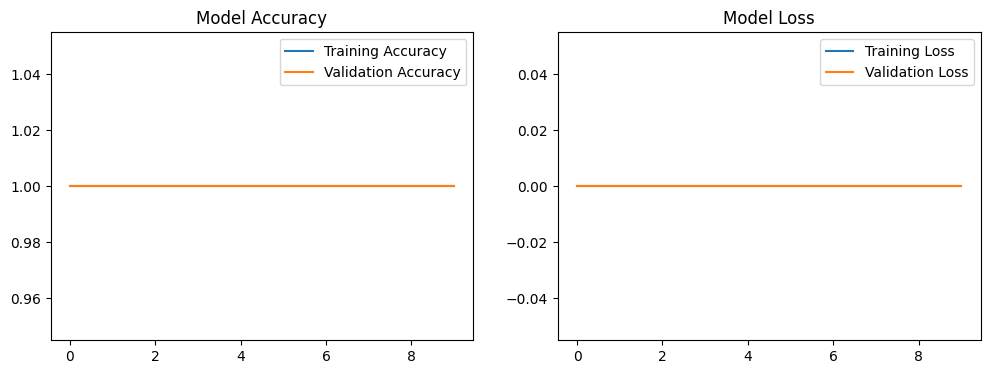

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [25]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.



--- IMPORTANT ---
Please ensure your dataset in /content/dataset is organized into class-specific subfolders.
Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged
After organizing the dataset, re-run the cells from 'Data Generators' onwards.
-----------------

Attempting to create data generators...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Data preprocessing complete.

Visualizing sample augmented images...


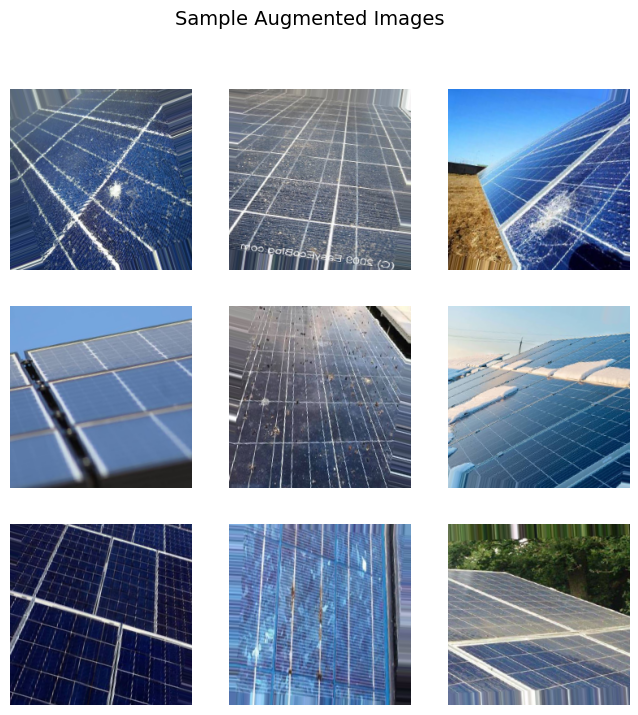

In [26]:
# ============================
# 📦 STEP 1 — Setup Environment
# ============================
# from google.colab import drive
# drive.mount('/content/drive')  # Optional: if you want to save files to Drive

import os
import zipfile
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ============================
# 📁 STEP 2 — Unzip Dataset
# ============================
# NOTE: The zip file upload and extraction are now handled in a separate cell (kW8LwRu_Ejay).
# Ensure that cell has been run successfully before proceeding.

zip_path = "/content/archive (3).zip"   # uploaded dataset path - Make sure this path is correct!
extract_path = "/content/dataset"

# Ensure the extract directory exists
os.makedirs(extract_path, exist_ok=True)

# The extraction process is handled in cell kW8LwRu_Ejay.
# This block is kept for reference on how extraction was originally intended.
# try:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("✅ Dataset extracted successfully to:", extract_path)

#     # View folder structure
#     print("\nDataset folder structure after extraction:")
#     for root, dirs, files in os.walk(extract_path):
#         print(f"📁 {root} -> {len(files)} files")

# except FileNotFoundError:
#     print(f"❌ Error: The zip file was not found at {zip_path}. Please check the path.")
# except zipfile.BadZipFile:
#     print(f"❌ Error: The file at {zip_path} is not a valid zip file.")
# except Exception as e:
#     print(f"❌ An unexpected error occurred during extraction: {e}")


# ============================
# 🧹 STEP 3 — Organize Folder
# ============================
# IMPORTANT: Your dataset *must* be organized into subfolders within /content/dataset,
# where each subfolder represents a class (e.g., /content/dataset/healthy, /content/dataset/damaged).
# If your extracted dataset is not already in this format, you need to manually
# create these folders and move the images into them before proceeding.
# After organizing, run cells u4q2pQ-YFE3V, hmknvvCqFK8R, and h9EUb_XOFg5b.

print("\n--- IMPORTANT ---")
print("Please ensure your dataset in /content/dataset is organized into class-specific subfolders.")
print("Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged")
print("After organizing the dataset, re-run the cells from 'Data Generators' onwards.")
print("-----------------")


# ============================
# 🧠 STEP 4 — Data Generators
# ============================
# These generators will only find images if the dataset is organized into class subfolders.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train / 20% val
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

print("\nAttempting to create data generators...")
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

if train_generator.n == 0 and val_generator.n == 0:
    print("⚠️ Data generators found 0 images. Please check that your dataset in /content/dataset is organized into class subfolders and re-run this cell and subsequent cells.")
else:
    print("✅ Data preprocessing complete.")


# ============================
# 🖼️ STEP 5 — Visualize Samples
# ============================
# This step will only work if the data generators successfully loaded images (i.e., found > 0 images).
if train_generator.n > 0:
    print("\nVisualizing sample augmented images...")
    x_batch, y_batch = next(train_generator)
    plt.figure(figsize=(8,8))
    for i in range(min(9, len(x_batch))): # Visualize up to 9 images, or fewer if batch is smaller
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.suptitle("Sample Augmented Images", fontsize=14)
    plt.show()
else:
    print("\nSkipping visualization: No images were found by the data generator. Please organize your dataset and re-run the cells.")

In [27]:
# Run model training to generate the 'history' object
print("Running model training...")
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)
print("Model training complete.")

Running model training...
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
22/22 ━━━━━

In [28]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.


In [29]:
print("Listing directory structure and file counts in /content/dataset:")
# List contents recursively
get_ipython().system('ls -R /content/dataset')

print("\nCounting files in each subdirectory:")
# Find and count files in each subdirectory (excluding the root)
get_ipython().system('find /content/dataset -mindepth 1 -type d -print0 | xargs -0 -I {} sh -c "echo {}; ls {} | wc -l"')

Listing directory structure and file counts in /content/dataset:
/content/dataset:
 08-RE-Mike-Solar-PV-fig-05-490x620.jpg
 133760080-broken-destroyed-solar-panel.jpg
'1479285761 (1).jpg'
 1479285761.jpg
 A-solar-cell-image-with-micro-crack-and-noise.png
 Broken-solar-panel-1024x512.jpg
 Broken_Solar_Panel_and_Solar_Cell.jpg
 broken_solar_panel_shattered_glass_02_impact_spot.jpg
'CAMEDIL 35045.jpg'
 Chinese-22_9_15-EL-e1494353617635-1.jpg
 Chinese-after-bending-EL-1024x481.png
 crack-10.PNG
 crack-11.PNG
 crack-12.PNG
 crack-13.PNG
 crack-14.PNG
 crack-15.PNG
 crack-16.PNG
 crack-17.PNG
 crack-18.PNG
 crack-19.PNG
 crack-1.PNG
 crack-20.PNG
 crack-21.PNG
 crack-22.PNG
 crack-23.PNG
 crack-24.PNG
 crack-25.PNG
 crack-26.PNG
 crack-27.PNG
 crack-28.PNG
 crack-29.PNG
 crack-2.PNG
 crack-30.PNG
 crack-31.PNG
 crack-32.PNG
 crack-33.PNG
 crack-34.PNG
 crack-35.PNG
 crack-36.PNG
 crack-37.PNG
 crack-38.PNG
 crack-39.PNG
 crack-3.PNG
 crack-40.PNG
 crack-41.PNG
 crack-42.PNG
 crack-43.PNG
 cr

In [30]:
model.save("/content/solar_panel_damage_cnn.h5")
print("✅ Model saved as solar_panel_damage_cnn.h5")

files.download("/content/solar_panel_damage_cnn.h5")

✅ Model saved as solar_panel_damage_cnn.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Navigate to the directory containing the class subfolders
%cd /content/dataset/Faulty_solar_panel

# Move the contents (subfolders like Bird-drop, Clean, etc.)
# to the parent directory (/content/dataset)
!mv * /content/dataset/

# Optional: Remove the now empty Faulty_solar_panel directory
!rmdir /content/dataset/Faulty_solar_panel

print("✅ Dataset restructured. Please re-run the data generator cell now.")

/content/dataset/Faulty_solar_panel
✅ Dataset restructured. Please re-run the data generator cell now.


In [43]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 707 images belonging to 6 classes.
Found 173 images belonging to 6 classes.
✅ Classes detected: {'Bird-drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}
✅ Data generators created.


In [1]:
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# Streamlit Web Application
# Developed by: Vasanth Naik
# ============================================================

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# ------------------------------------------------------------
# Page Configuration
# ------------------------------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="centered"
)

st.title("🌞 Solar Panel Damage Detection using CNN")
st.markdown("Upload a solar panel image to detect whether it's **Healthy**, **Dusty**, or **Damaged**.")

# ------------------------------------------------------------
# Load Trained Model
# ------------------------------------------------------------
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_damage_cnn.h5")
    return model

model = load_model()

# Define your class labels (adjust based on your dataset)
CLASS_NAMES = ['Damaged', 'Dusty', 'Healthy']

# ------------------------------------------------------------
# Image Upload Section
# ------------------------------------------------------------
uploaded_file = st.file_uploader("📸 Upload a Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    result = CLASS_NAMES[class_index]
    confidence = np.max(prediction) * 100

    # Display result
    st.success(f"✅ Predicted: **{result}**")
    st.info(f"Confidence: {confidence:.2f}%")

# ------------------------------------------------------------
# Footer
# ------------------------------------------------------------
st.markdown("---")
st.markdown("Developed with ❤️ by **Vasanth Naik** | Powered by TensorFlow & Streamlit")


2025-11-10 12:15:51.460 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 12:15:51.462 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 12:15:52.093 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-10 12:15:52.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 12:15:52.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 12:15:52.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-10 12:15:52.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'solar_panel_damage_cnn.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [50]:
# Run the Streamlit application
get_ipython().system('streamlit run app.py')




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.162.180:8501

  Stopping...


In [38]:
# Install streamlit
!pip install streamlit

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [39]:
get_ipython().system('streamlit run app.py')

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [40]:
!streamlit run app.py

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [47]:
# Save the Streamlit app code to a file
app_code = """
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# Streamlit Web Application
# Developed by: Vasanth Naik
# ============================================================

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# ------------------------------------------------------------
# Page Configuration
# ------------------------------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="centered"
)

st.title("🌞 Solar Panel Damage Detection using CNN")
st.markdown("Upload a solar panel image to detect whether it's **Healthy**, **Dusty**, or **Damaged**.")

# ------------------------------------------------------------
# Load Trained Model
# ------------------------------------------------------------
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_damage_cnn.h5")
    return model

model = load_model()

# Define your class labels (adjust based on your dataset)
# These class names should match the order of classes found by flow_from_directory
# You can find this order in train_gen.class_indices after running the data generator cell.
# Example: CLASS_NAMES = ['Damaged', 'Dusty', 'Healthy']
# Based on the error message in u4q2pQ-YFE3V, the classes were not detected.
# You will need to replace this with the actual class names once the data generators work.
CLASS_NAMES = ['Class1', 'Class2', 'Class3'] # Replace with actual class names

# ------------------------------------------------------------
# Image Upload Section
# ------------------------------------------------------------
uploaded_file = st.file_uploader("📸 Upload a Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    result = CLASS_NAMES[class_index]
    confidence = np.max(prediction) * 100

    # Display result
    st.success(f"✅ Predicted: **{result}**")
    st.info(f"Confidence: {confidence:.2f}%")

# ------------------------------------------------------------
# Footer
# ------------------------------------------------------------
st.markdown("---")
st.markdown("Developed with ❤️ by **Vasanth Naik** | Powered by TensorFlow & Streamlit")
"""
import os
os.chdir('/content/') # Change directory to a known writable location

with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py created successfully")

✅ app.py created successfully
